In [11]:
#1.Data Cleaning and Preprocessing

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Algerian_forest_fires_cleaned.csv")

# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns
df_clean = df.drop(columns=["day", "month", "year", "Classes"])  # 'Classes' is a label column, not needed for regression


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


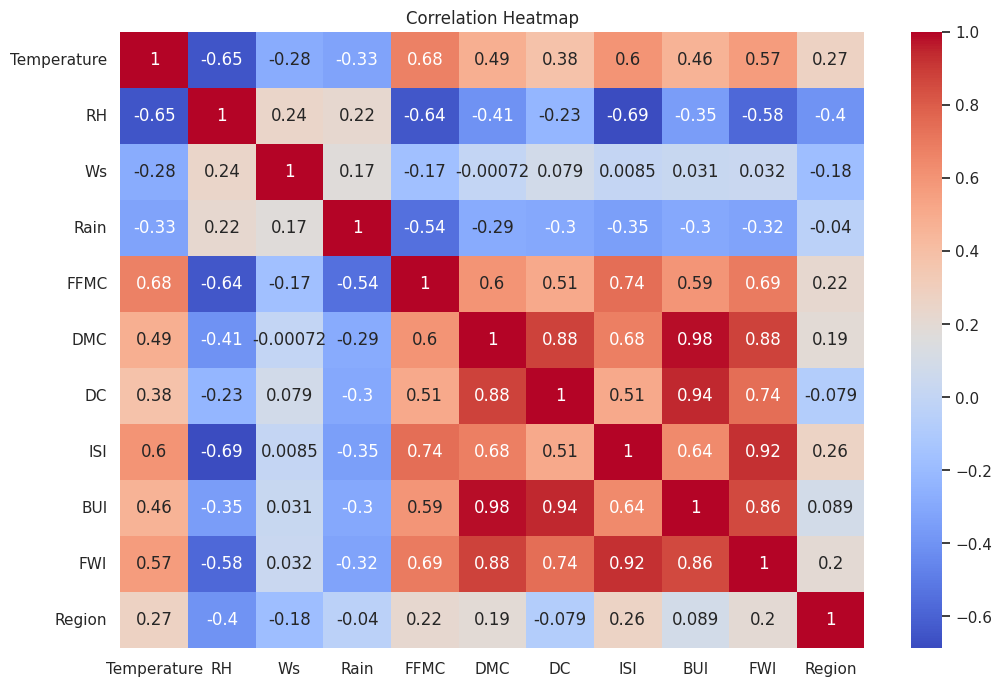

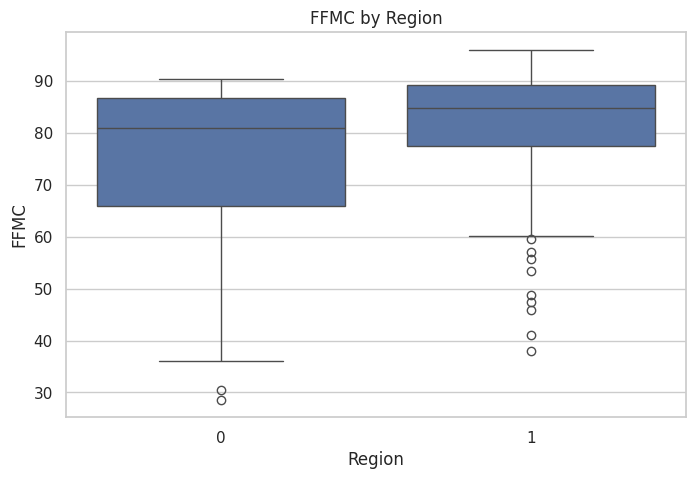

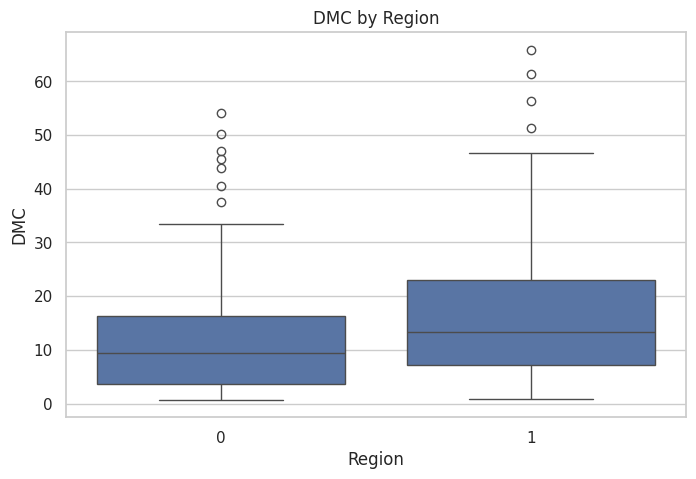

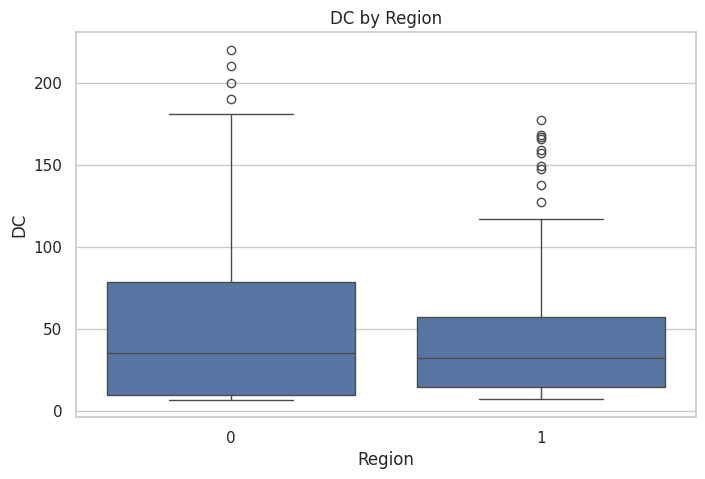

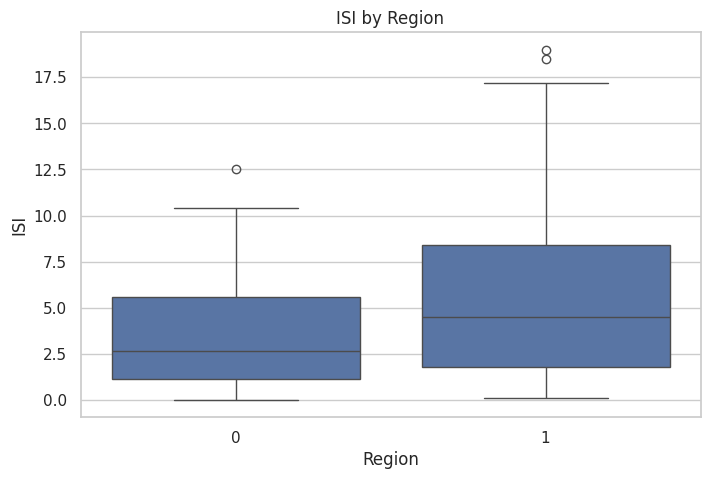

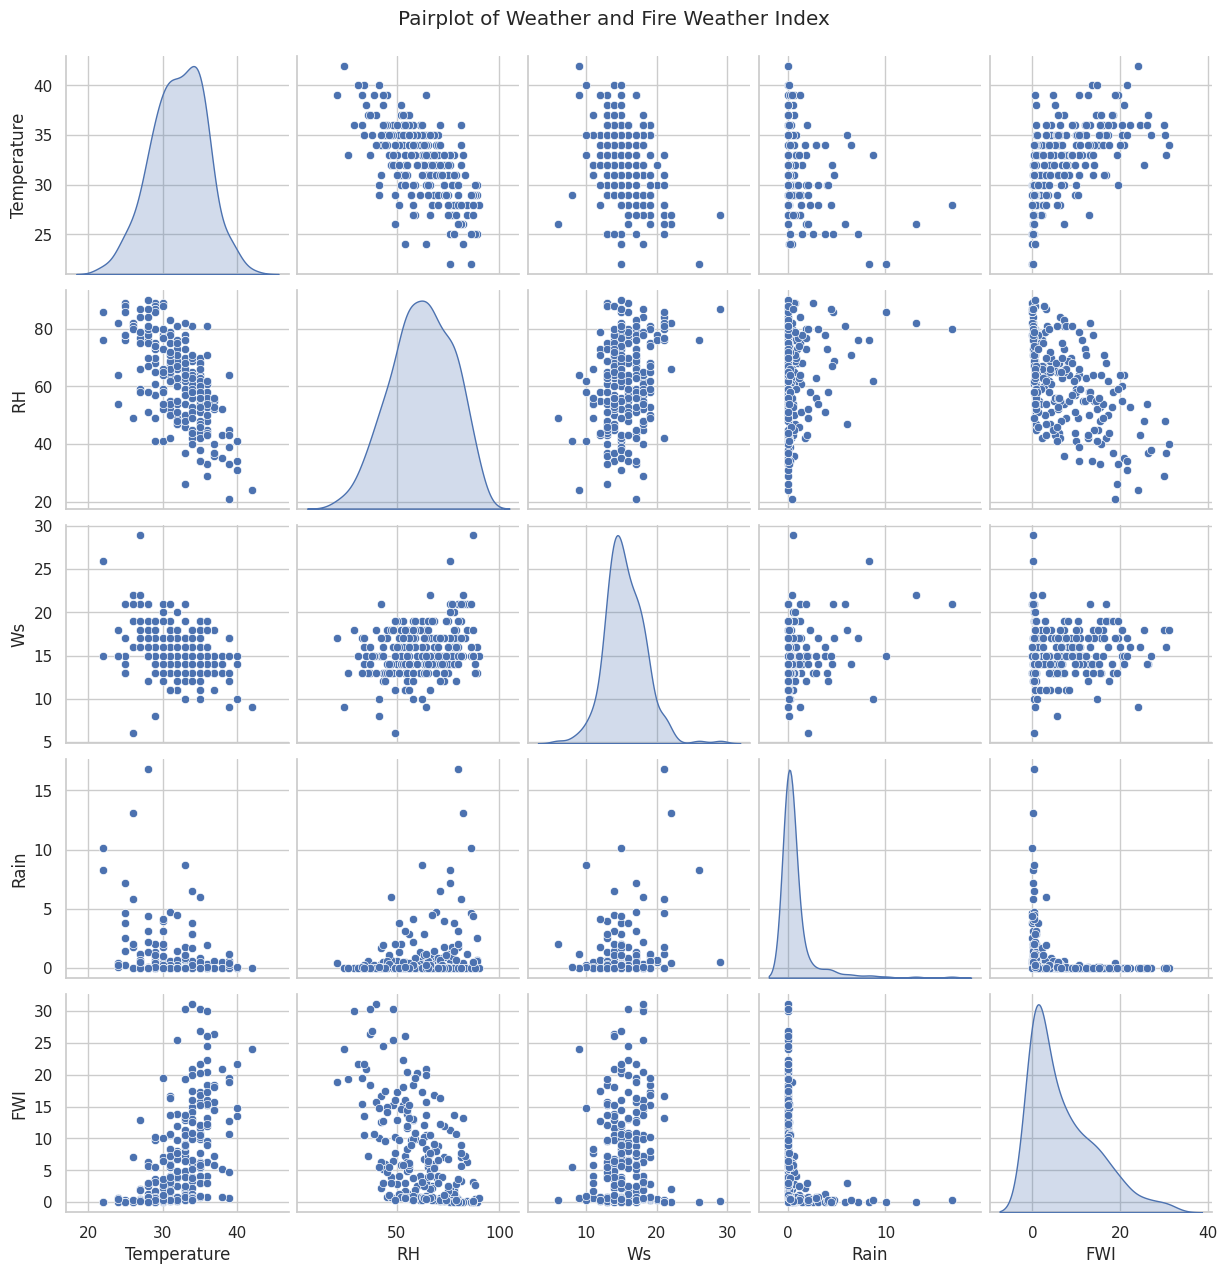

In [12]:
#2.Data Visualization and Observations

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for features by Region
for feature in ['FFMC', 'DMC', 'DC', 'ISI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Region', y=feature, data=df)
    plt.title(f"{feature} by Region")
    plt.show()

# Pairplot for weather-related features
sns.pairplot(df[['Temperature', 'RH', 'Ws', 'Rain', 'FWI']], diag_kind='kde')
plt.suptitle("Pairplot of Weather and Fire Weather Index", y=1.02)
plt.show()


In [14]:
# 3.Model Development and Analysis

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

# Define features and target
X = df_clean.drop(columns=["FWI"])
y = df_clean["FWI"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression + Cross-Validation
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)

# Lasso Regression + Cross-Validation
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': np.logspace(-3, 3, 50)}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])
print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])


Best Ridge alpha: 79.06043210907701
Best Lasso alpha: 0.49417133613238334


Linear Regression Results:
R² Score: 0.9877670557056266
RMSE: 0.6089016601638945
------------------------------
Ridge Regression Results:
R² Score: 0.9799252012302495
RMSE: 0.7800227320158807
------------------------------
Lasso Regression Results:
R² Score: 0.9692998897508034
RMSE: 0.9646097041053506
------------------------------


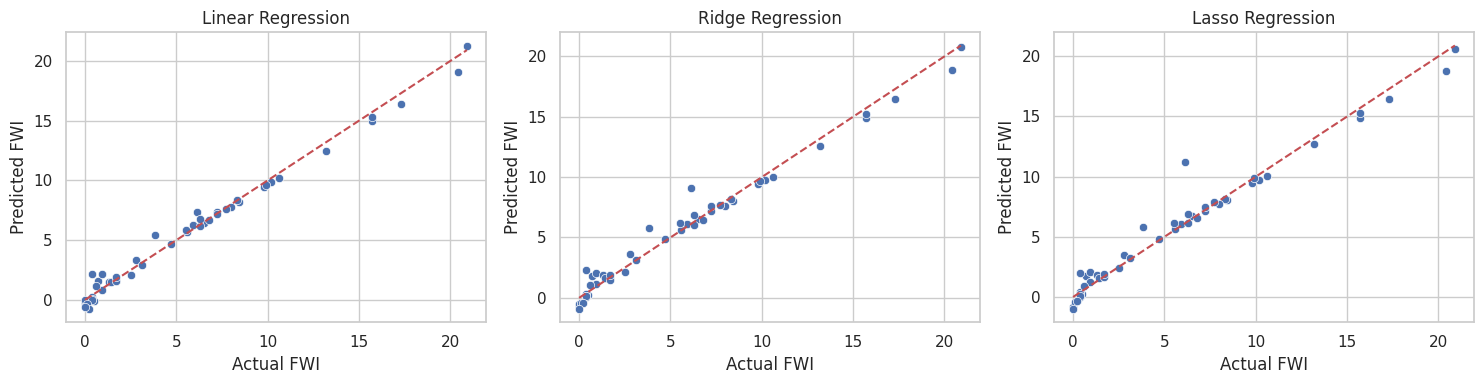

In [15]:
#Question 4: Model Evaluation and Testing

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    print(f"{name} Results:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-" * 30)

# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

# Visualization: Predictions vs Actual
models = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
}

plt.figure(figsize=(15, 4))
for i, (name, y_pred) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}")
    plt.xlabel("Actual FWI")
    plt.ylabel("Predicted FWI")
plt.tight_layout()
plt.show()
